In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rubin_scheduler.utils import m5_flat_sed
from rubin_scheduler.utils import SysEngVals
from rubin_scheduler.site_models import SeeingModel

In [2]:
# dark sky (per filter)
se_vals = SysEngVals()
dark_sky = se_vals.sky_mag
dark_sky

{'u': 23.051983,
 'g': 22.253839,
 'r': 21.197579,
 'i': 20.462795,
 'z': 19.606305,
 'y': 18.601512}

In [3]:
# fiducial seeing (per filter)
seeing_model = SeeingModel()
fwhm_500 = 0.6
airmass = 1.0
fwhm_eff = seeing_model(fwhm_z=fwhm_500, airmass=airmass)['fwhmEff']
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']
fwhm_eff = dict(zip(filterlist, fwhm_eff))
fwhm_eff

{'u': 0.9028135724330592,
 'g': 0.8541995456912611,
 'r': 0.8097465599661966,
 'i': 0.7790786082834846,
 'z': 0.7587285808106591,
 'y': 0.742436066986218}

In [4]:
exptimes = np.arange(30, 240, 1)
m5 = {}
for f in 'ugrizy':
    m5[f] = np.zeros(len(exptimes))
    for i, exp_time in enumerate(exptimes):
        m5[f][i] = m5_flat_sed(visit_filter=f, 
                               musky=dark_sky[f], 
                               fwhm_eff=fwhm_eff[f], 
                               exp_time=exp_time, 
                               airmass=airmass, 
                               nexp=1, tau_cloud=0)

Text(0.5, 1.0, 'Depth with variable exposure time, \n dark sky, fiducial seeing, X=1.0')

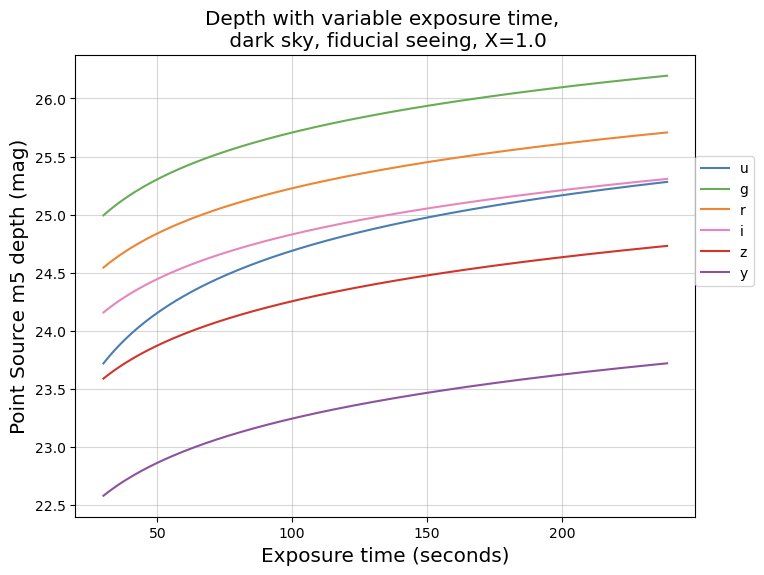

In [5]:
colors = {"u": "cyan", "g": "g", "r": "orange", "i": "r", "z": "m", "y": "b"}
filter_rgb_map = {
    "u": (74 / 256, 125 / 256, 179 / 256),
    "g": (104 / 256, 173 / 256, 87 / 256),
    "r": (238 / 256, 134 / 256, 50 / 256),
    "i": (232 / 256, 135 / 256, 189 / 256),
    "z": (209 / 256, 53 / 256, 43 / 256),
    "y": (142 / 256, 82 / 256, 159 / 256),
}

plt.figure(figsize=(8,6))
for f in filterlist:
    plt.plot(exptimes, m5[f], color=filter_rgb_map[f], label=f)
plt.legend(loc=(1.0, 0.5))
plt.grid(True, alpha=0.5)
plt.xlabel("Exposure time (seconds)", fontsize='x-large')
plt.ylabel("Point Source m5 depth (mag)", fontsize='x-large')
plt.title("Depth with variable exposure time, \n dark sky, fiducial seeing, X=1.0", fontsize='x-large')

In [6]:
from bokeh.io import output_notebook, output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

# Create plot
BAND_COLORS = dict(u="#56b4e9", g="#008060", r="#ff4000", i="#850000", z="#6600cc", y="#222222")
plot = figure(width=600, height=500, 
              title="Depth with variable exposure time - Dark sky, fiducial seeing, X=1.0", 
              x_axis_label="Exposure Time (seconds)", 
              y_axis_label="Point Source m5 depth (mags)")


depths = pd.DataFrame(m5)
depths['exposure time'] = exptimes
data = ColumnDataSource(depths)

for f in 'ugrizy':
    plot.line(x='exposure time', y=f, source=data, line_width=2, 
                           line_color=BAND_COLORS[f], 
                            name=f, legend_label=f)

plot.legend.location = 'bottom_right'
plot.legend.orientation = 'horizontal'
plot.legend.nrows = 2

hover_tool = HoverTool()
hover_tool.tooltips = [
    ("(band, exptime, m5)", "($name, $x{(0.0)}, $y{(0.00)})"),
]
plot.add_tools(hover_tool)

plot.title.text_font_size = '15px'

#Show plot
output_notebook()
#output_file('depth_plot.html')
show(plot)

Loading BokehJS ...